In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [20]:
path = 'C:/Users/asnis/Desktop/VRPTW-master/instances/C203.txt'

In [21]:
solution = """0 0.0 93 8.246211251235321 67 116.92775294350473 62 212.75870483835004 27 334.66481710543763 30 428.9074577925569 99 561.91908412777 100 656.91908412777 69 797.9092792636978 68 893.7402311585431 65 989.1253959656776 49 1085.5285202031105 55 1183.338769879017 36 1320.9727913342751 56 1464.1235203979484 58 1556.1235203979484 84 1708.0347471666048 40 1850.5323661602315 44 1945.0045021152312 45 2105 76 2255.2079728939616 17 2427.5730140218575 13 2521.5730140218575 25 2620.5730140218575 9 2717.7841165727855 11 2814.855184384651 10 2907.855184384651 8 3003.937946914949 71 3159.862145810347 0 3306.870917065304
0 0.0 22 22 74 213 64 493 6 617.1760149812701 66 738.9565121454115 35 876 38 1063 39 1158 53 1307.464274989274 88 1546 23 1687.3517283058711 15 2216 70 2396.1387818865996 80 2513 79 2608.3851648071345 42 2752.42218915156 41 2844.42218915156 77 2973.639532253815 81 3080.040751720672 73 3178.6430769877143 0 3324.3566300964508
0 0.0 33 685 92 849.2024258363566 4 1261 60 1416.9241988953981 85 1572.3611914913297 78 2802 87 3097 0 3211.3310501211927
0 0.0 12 38.07886552931954 14 131.07886552931956 16 223.07886552931956 19 320.14993334118503 18 415.14993334118503 26 519.9147564014185 28 617.977014149717 34 718.747343763986 37 816.5575934398927 32 914.5575934398927 31 1009.5575934398927 51 1115.3689817407344 46 1215.6646118817214 57 1316.4349414959904 59 1411.4349414959904 54 1505.4349414959904 86 1646.4349414959904 83 1742.4349414959904 82 1835.4349414959904 3 1944.539914670533 7 2038.6630202961508 98 2133.6630202961505 95 2230.0661445335836 94 2323.6716958090474 97 2419.5026477038928 1 2522.3088961787585 0 2640.0397454264826
0 0.0 63 14.142135623730951 61 114.14213562373095 72 207.14213562373095 96 310.5957596708047 90 415.72850562122625 91 510.72850562122625 89 606.3853598707187 2 708.9153239568604 75 803.9153239568604 5 896.9153239568604 21 1001.9153239568604 20 1097.9153239568604 24 1192.9153239568604 29 1287.9153239568604 52 1393.7267122577023 50 1486.8889899178707 47 1581.8889899178707 43 1674.8889899178707 48 1770.7199418127161 0 1871.4902714269851""".split('\n')
# solution = """0 0.0 65 12.806248474865697 5 128.51616873923058 17 224.51616873923058 18 317.5161687392306 19 412.5161687392306 93 552.7655468448351 85 667.9449034688635 88 760.9449034688635 80 891.2561922103562 1 1039.9843796504604 0 1108.6659213427297
# 0 0.0 57 35 98 187.6418390534633 95 284.04496329089613 94 377.65051456636013 92 471.2560658418241 16 608.2560658418241 48 753.8348387681851 59 861.8625951455051 50 972.6712471921899 0 1085.4747556941727
# 0 0.0 87 25.495097567963924 43 153.23102209619034 20 258.5280806369687 27 355.80819052624923 29 449.41374180171323 30 544.4137418017133 28 637.4137418017133 64 762.7690808610407 89 884.5338412095779 21 1008.0748608720747 0 1108.2728998992602
# 0 0.0 13 30.805843601498726 90 163.7476647086665 67 273.5970979499457 62 369.428049844791 74 462.428049844791 72 557.4280498447911 60 678.2338934462898 68 795.1597174819624 66 890.5448822890969 69 982.5448822890969 49 1089.544882289097 0 1198.7542550013954
# 0 0.0 96 36.05551275463989 55 193.5017876703089 24 322.4119405869963 10 431.2799028511095 44 472.40468658748637 46 565.2331137122326 45 657.2331137122326 36 776.387873186459 34 869.387873186459 22 980.5774932868761 47 1087.6947360555 0 1195.72249243282
# 0 0.0 42 19.313207915827967 63 128.10150214388392 31 258.4127908853767 15 394.5105131718411 14 489.89567797897564 9 601.827390178437 26 631.6768234197162 23 724.6768234197162 91 847.0650929011196 0 959.4257726761175
# 0 0.0 78 50.28916384272063 25 205.54251624702243 3 317.56523179256766 8 412.03736774756726 38 549.2390626323911 39 644.2390626323911 6 780.8866777911535 99 889.4877530288918 52 1033.5710221608517 0 1144.784225596448
# 0 0.0 32 31.622776601683793 33 123.6227766016838 7 254.8538328578604 54 320.88953576234803 37 460.88953576234803 97 624.2993443712799 79 775.5692390994415 0 916.64761025593
# 0 0.0 81 47.43416490252569 41 187.52408404799846 86 316.12460217923604 71 441.3524320868531 70 536.3524320868531 73 629.3524320868531 77 723.3524320868531 2 872.0806195269572 75 907.0806195269572 0 1012.8920078277991
# 0 0.0 76 119 40 264.2268050859363 35 384.6406177374274 11 519.983753932446 61 651.7689187639984 12 802.1841486319712 0 930.2630141612907
# 0 0.0 53 193 82 341.8302643203309 83 434.8302643203309 84 528.4358155957949 100 649.3227060187559 4 760.7236405777886 51 842.3529571707859 0 957.3529571707859
# 0 0.0 56 308 58 400.0 0 535.0444225182208""".split('\n')
# Total distance 12273.30033457697

# solution = """0 0.0 32 31.622776601683793 33 123.6227766016838 31 219.0079414088183 29 327.03569778613826 30 422.03569778613826 28 515.0356977861383 26 607.0356977861383 23 700.0356977861383 22 793.0356977861383 21 885.0356977861383 0 985.2337368133238
# 0 0.0 57 35 55 127.0 53 227.19803902718556 54 322.5832038343201 44 434.943883609318 59 541.0993780307215 60 641.539684539632 51 758.4655085753045 50 850.7015765528043 49 944.3071278282683 47 1036.3071278282682 0 1144.3348842055882
# 0 0.0 81 47.43416490252569 78 140.43416490252568 76 232.43416490252568 71 327.4341649025257 70 422.4341649025257 73 515.4341649025257 77 609.4341649025257 79 700.4341649025257 80 795.8193297096602 0 937.2974804145953
# 0 0.0 13 30.805843601498726 17 124.80584360149872 18 217.80584360149874 19 312.80584360149874 16 409.8769114133642 14 501.8769114133642 12 594.8769114133643 100 714.8769114133643 0 842.9557769426838
# 0 0.0 3 16.1245154965971 98 124.48207524728292 96 219.86724005441744 94 315.25240486155195 92 408.85795613701595 93 500.85795613701595 97 595.8579561370159 99 692.9290239488814 2 797.0711595726124 1 830 0 898.6815416922694
# 0 0.0 24 15 25 107.0 27 199.0 0 306.11724276862367
# 0 0.0 20 10 7 118.8679622641132 5 131.104030241613 95 226.104030241613 8 342.9368459716105 10 436.5423972470745 15 462.0606817757577 11 570.6617570134961 9 663.8240346736644 6 676.0601026511642 4 768.2961706286641 0 826.4069409049389
# 0 0.0 42 19.313207915827967 41 111.31320791582797 40 203.31320791582797 56 318.8083054837919 58 410.8083054837919 38 552.4706708961498 39 647.4706708961498 36 742.4706708961498 34 835.4706708961498 52 945.1937538194659 0 1056.4069572550623
# 0 0.0 90 20.615528128088304 87 115.6155281280883 86 206.6155281280883 83 302.6155281280883 82 395.6155281280883 84 491.4464800229336 85 584.2749071476799 88 677.2749071476799 89 770.1033342724261 91 863.7088855478901 75 969.520273848732 0 1075.3316621495737
# 0 0.0 65 12.806248474865697 63 104.8062484748657 62 199.8062484748657 74 292.8062484748657 72 387.8062484748657 61 480.8062484748657 64 572.8062484748657 68 669 66 764.3851648071345 69 856.3851648071345 0 962.1965531079765
# 0 0.0 67 12.206555615733702 43 117.07262436305221 35 235.07262436305223 37 330.90357625789756 46 450.02401581501965 48 542.8524429397659 45 634.8524429397659 0 747.2131227147638""".split('\n')

# solution = """0 0.0 288 64.20280367709809 148 89.8233030289114 515 110.1189331698984 551 137.23617593852208 477 156.72300891902722 361 175.32533418606985 568 188.93088546153385 389 215.93088546153385 145 250.93088546153385 0 323.36485057668574       
# 0 0.0 355 99.62429422585637 425 129.7489060233545 328 148.9684504806474 307 173.28627154392373 509 204.7571820975076 547 272 470 348.18912297349164 10 364.02007486833696 0 465.9548343448266
# 0 0.0 411 59.464274989274024 190 123.95280589257514 392 175 438 210.17935662402834 571 225.56452143116286 67 249.45696542061268 544 269.50684104173354 281 331.98540809534126 121 365.5226126872209 68 406.8275643722179 0 479.89102447392816
# 0 0.0 398 31.32091952673165 207 57.8738648839785 239 90.89559375042117 0 112.6002936611408
# 0 0.0 71 17.029386365926403 221 71.31256601689546 593 105.08229466490488 37 133.11005104222482 365 157.67027082078587 88 172.67027082078587 508 194.33217461047647 200 211.40324242234195 225 263.5102489651965 0 314.9951859905796
# 0 0.0 264 39.56008088970496 408 93.42350528862758 315 105.42350528862758 387 170.50526270430922 272 197.53464907023562 205 278.81578261902257 497 372.4937367049107 276 521.5800408473388 204 566 523 607.7647603485372 193 620.000828326037 49 751.4956841842172 0 948.0566661713412
# 0 0.0 106 32.64965543462902 269 56.79179105835997 479 97.66248913922622 247 113.98704445956298 414 133.98704445956298 434 154.75737407383198 237 187.84416683506237 167 213.65555513590425 185 229.73831766620248 266 266.94125868367337 0 280.54680995913736
# 0 0.0 101 42 589 185.9589489358587 512 215.27215685168667 542 265.9784217257819 391 313.31473113097087 279 341.3424875082908 491 421.7271449273619 394 483 454 507 97 601.308955633432 540 619.5551668846673 72 726 271 782 388 809.7200451466693 0 851.9690761398635
# 0 0.0 110 88.52683209061533 40 126.95217289771912 127 153.95217289771912 442 207.36875958990396 380 232.23482833722247 173 263.7754875657605 285 287.7754875657605 202 336 171 355.48683298050514 199 382.51621934643157 0 503.1507528339462
# 0 0.0 550 22.561028345356956 322 64.18380494704076 537 165.1013500084864 393 183.16360775678496 249 203.7937535695196 384 245.55851391805678 403 279.26505310031615 65 323.74693239944946 7 352.42847409171884 482 439 0 519.8307842678591  
# 0 0.0 13 7.280109889280518 261 32.28010988928052 172 56.17255387873032 0 96.84827717908627
# 0 0.0 338 48.83646178829912 162 121.35046022065026 599 154.02202831815953 529 195.4226652543747 44 226.2313173010595 298 245.6652984331161 152 258.8275760932845 241 270.2417896556576 100 305.42114627968596 212 336.0366744077743 0 439.71698183681724
# 0 0.0 500 65.86349520030045 79 117.04601576424845 559 168.77130785429858 87 221.95695361767696 561 247.95695361767696 494 266.0192113659755 462 333 445 382.560080889705 208 401.5043527997041 0 494.99087865867136
# 0 0.0 243 76.36753236814714 311 89.97308364361113 93 120.09769544110924 490 132.92612256585542 273 195.69922177369045 174 258.69922177369045 20 272.9418624608097 151 290.0129302726752 26 345.554120419618 0 406.9739609483478
# 0 0.0 395 203.66639388961548 534 233.3894768129315 295 256.9909473216669 32 371.0678419717284 447 482.7782150906979 35 509.4215320677912 23 577 33 615.4604989415154 294 776 36 813.459060435492 0 906.3143559814015
# 0 0.0 303 48.25971404805462 325 161.04589989031652 341 257.33031331475837 545 287.9458414428467 397 299.9458414428467 160 408.73855372467443 209 459.96960998085103 552 481.96960998085103 164 501.8691049174627 275 525.210768981589 483 540.3097884951818 191 600.3097884951818 308 622.9588991358553 538 766 0 819.2781700167648
# 0 0.0 69 164.17673403987544 179 262.56791007006524 11 311.6191584495985 549 427 334 493.75385449465085 373 602 149 714.0784012413988 180 727.6839525168627 211 751.1003603818615 8 818 0 991.0030674557997
# 0 0.0 293 71.34423592694787 286 143.98607498041116 227 195.42277369061247 566 271.4909203272482 357 289.3011700031549 297 304.6863348102894 553 333.5542970744026 518 428.4071108167883 270 472.4218135201782 251 503.44560956180686 66 555.9661928127454 360 598.9510378176866 426 647.0692749227784 112 762 0 803.4006369362152
# 0 0.0 16 12.165525060596439 198 78.06722449809118 370 95.06722449809118 159 124.17219767263398 274 147.6258217197077 42 184.79197713411995 0 251.80074838907683
# 0 0.0 263 13 140 70.20169488482378 310 89.14596679482294 244 124.22583920279185 192 154.621917257163 324 206.81196347662097 469 242 89 270.68154169226943 138 300.53097493354863 0 359.36743672184775
# 0 0.0 371 57.14017850864661 431 147.2962762180536 455 170.2962762180536 52 197.38428370868866 410 214.09248764118803 85 237.13089245159333 284 249.36696042909313 27 264.4659799426859 453 277.4659799426859 214 301.7838010059623 109 377.06013668743265 0 439.861651817209
# 0 0.0 560 71.11258679024411 30 167.095143160708 135 261.9715238563998 317 279.0425916682653 108 310.4201499946972 188 524.3539627869853 420 716.0157364213964 146 749.8694573051495 543 812 53 880.8302643203309 519 902.4921681100216 429 991.8961982344429 0 1068.6270007172543
# 0 0.0 233 17.26267650163207 316 90.82367082991489 132 129.45931295646758 422 150.2296425707366 313 162.2296425707366 514 186.78986234929764 257 262.30321976593444 186 275.30321976593444 0 315.71703241742557
# 0 0.0 344 152.88230767489088 258 167.98132718848368 287 213 548 322.53893710503445 503 378.14595410899994 215 418.9517977104987 260 435.9517977104987 332 497 329 579.7323861838727 342 645.1760512863891 478 755 116 767.2360679774998 0 880.279748036007
# 0 0.0 579 93.47192091746055 570 106.47192091746055 577 134.1919660641299 216 151.4720759534104 312 213.21180923451652 358 242.5250171503445 289 257.5250171503445 465 290.5467460167872 600 309.1490712838298 439 372.6373877650951 153 449.3681902479066 0 491.92583144010604
# 0 0.0 563 53.150729063673246 187 99.55127851007583 86 136.75421952754672 306 160.35569003628217 555 179.57523449357507 554 211.93591426857296 588 231.98578988969385 252 279.46911951767646 510 333.85380156002077 0 420.8213271795962      
# 0 0.0 359 22.02271554554524 404 77.2443917639253 60 109.6050715389232 564 196 92 270.0312423743285 137 349.4070306581383 131 476.13320595742584 390 541.1332059574258 335 628.1916253546598 532 745 206 811.6392090340252 415 894 80 933 0 1040.637083119069
# 0 0.0 166 36.796738985948195 348 57.092369126935196 522 79.74147976760871 245 103.88361539133966 2 138.88361539133967 461 150.29782895371278 103 167.36889676557826 413 195.6171843564729 0 258.8712921792503
# 0 0.0 377 84.0535543567314 62 119.54865192469532 584 156.71480733910758 402 223.74988426550436 235 346 437 518.0524606416083 12 592 536 704.3425620160058 76 789 530 826.0 134 849.6014705087355 585 867.8476817599708 576 879.8476817599708 407 936.92209094373 351 968.8765893438302 0 1127.0656577665718
# 0 0.0 223 87.70974860299168 158 120.79654136422207 156 158.59941891313775 378 250.81863807751563 299 297.6153770634638 399 335.129010047859 565 426.9703199102995 114 530.0563016691015 527 651.8865301406556 520 797.7173072127168 123 829.8532508338955 163 917.1901760378366 47 1041.1814037705003 56 1084.4830553811937 194 1128 0 1176.832975677895
# 0 0.0 524 186.03763060198332 51 198.27369857948312 314 218.90384439221776 34 251.376049446462 141 270.86288242696713 381 288.0739849778951 301 309.11934599508237 21 384.8612656506568 265 443.9020649916137 0 530.4396374642236
# 0 0.0 590 45.27692569068709 435 63.08717536659374 507 160.45421720732452 98 192.65782051849902 107 239.37294001987067 242 273.96968777236833 111 308.7285245786482 304 369.88514682836285 383 439.5257370333566 446 492 484 542 236 588.1247837363769 15 767 17 807 0 925.5218871933215
# 0 0.0 504 107.07474025184464 255 136.99959909701593 326 152 418 183.02379604162863 224 197.14690166724628 321 225.58599058183205 575 252.6739980724671 183 291.948560409076 346 310.5508856761186 459 346.0459832440825 0 462.347441371429  
# 0 0.0 436 38.8329756778952 267 84.56811244830647 305 117.99886147602643 57 138.43916798493697 541 158.63720701212253 488 174.2940612616149 82 202.32181763893485 262 216.4449232645525 234 292.3691221599505 0 337.3691221599505
# 0 0.0 74 85.95929269136641 333 127.91238330870733 84 154.19120390480703 350 173.41074836209992 196 196.86437240917363 345 219.90277721957892 369 282.2477865327885 0 342.8541102483085
# 0 0.0 474 70.21395872616783 495 92.86306936684134 318 110.9253271151399 24 135.24314817841625 405 165.04213805163957 506 214.96706760699382 339 251.1395722635986 94 287 77 309.08304597359455 580 320.08304597359455 78 372.1306380568518 0 429.67009535287065
# 0 0.0 451 56.08029957123981 433 163.824864637539 28 197.59459328554843 120 217.64446890666932 513 240.17443299281098 143 338.7012650834263 1 474.56627213463173 460 497.56627213463173 476 707.0155137977677 217 724.0865816096332 165 769.0865816096332 587 900 309 1009.929975482835 0 1075.2924176255005
# 0 0.0 463 49.8196748283246 31 99.63173330311336 3 113.23728457857736 240 133.28716019969823 63 166.28716019969823 498 179.4494378598666 592 193.92157381486618 428 215.10191370236512 175 272.52553650788263 222 316.58430923973543 0 353.602821411948
# 0 0.0 526 40.311288741492746 379 113.34302677877045 466 133.19188458056655 195 152.19188458056655 323 164.42795255806635 133 178.90008851306592 96 195.30321275049877 218 208.46549041066714 95 250 102 267.28010988928054 118 326.3107125778056 117 352.3107125778056 0 387.39058498577447
# 0 0.0 6 64.77653896280658 456 104.92616582616925 598 149.85466421931523 535 174.88796059768814 485 193.8322325076873 595 209.8322325076873 300 229.2662136397439 452 263.28703793867254 409 290.9788439516267 157 332.99446513879093 0 419.0536526180166
# 0 0.0 230 59.22837157984339 256 96.95922082756748 347 131.1459940724631 246 170.21487777996037 416 195.21487777996037 419 215.06373558175648 231 243.09149195907642 382 273.7070200871647 372 307.7902092447493 525 341 583 374.76972864800945 586 419.9407394381474 0 490.7683647411296
# 0 0.0 457 111.48542505637228 282 150.55430876386956 558 190.23595292318123 473 252.40874276616356 259 277.17356582639695 546 424.6544735918027 468 536.3648467107722 501 612.3117950859624 277 647.6100163673095 594 783 396 843 0 941.2043082847998
# 0 0.0 556 18.601075237738275 201 114.30405068200159 278 172.3144662186328 340 188.1454181134781 99 204.2281806437763 496 240.70458523352377 531 265.0224062968001 406 281.7306102292995 232 313.7533257748447 115 340.0321463709444 596 351.0321463709444 0 524.3263593731203
# 0 0.0 401 60.03332407921454 58 152.57422303240017 83 178.2266988748987 154 246.6390263409396 444 265.694411479077 90 317.7538931687032 562 359.5343903328446 489 370.94860389521773 129 402.5356370401406 253 430.9747259547264 290 479 597 523.655446902327 0 641.1449812766092
# 0 0.0 302 12.806248474865697 449 108.50922391912901 337 158.43415347448328 45 199.48250286700332 18 239.4991649066106 144 285.5546776612505 582 321 203 364.1360830515618 48 425.48781135743286 499 542.3802806899354 430 574 441 629 572 722 91 804 0 938.787819918452
# 0 0.0 238 92.07062506576133 292 119.95916888575965 291 206.35943066541589 567 217.773644227789 70 277.0179332367695 220 288.0179332367695 368 353.09969065245116 492 428.71980951854283 41 472.89582449981293 125 587 5 724.4872542648872 591 783.5790050994215 412 868.2114377276026 362 959 0 1038.0289794216892
# 0 0.0 516 81.32035415564789 376 120.52651788866837 481 147.64376065729206 505 248.3520844208806 363 337.7561145453019 119 421.9720158064198 189 440.5743410734624 168 636.7463045910662 467 729 113 816.103826104805 64 855.1727098123023 9 899 366 947 0 1057.244700608062
# 0 0.0 502 28.653097563788805 128 81.83874332716718 29 119.69551988153542 440 186.58137049484696 487 208.24327428453756 400 307.2938217281103 25 378.0227275308662 374 439.218430475547 105 461.2600250543393 170 472.2600250543393 155 545 122 628.0547739713155 0 681.7354333069986
# 0 0.0 364 23.08679276123039 578 99.72762108741495 330 150.0389098289077 46 163.20118748907606 427 200.85982086095473 320 235.45656861345242 327 284.81390592176126 254 382.9331433220021 472 493 182 662 458 734.393909959226 61 770 0 927.4923726841494
# 0 0.0 4 31.38470965295043 336 56.51745560337199 354 75.73700006066487 50 97.94355567639857 423 114.0263182066968 229 125.44053176906989 139 144.66007622636278 38 162.72233397466132 75 177.72233397466132 0 233.72233397466132
# 0 0.0 486 60.802960454241045 43 80.02250491153393 280 116.59316542270678 385 153.46322310779559 386 194.47934794633724 210 240.7146898103241 54 256.0998546174586 296 291.5949521854225 81 319.8432397763172 228 363.4438350091401 142 403.5270529221228 55 459.5379212034321 448 553 0 662.0201999594022
# 0 0.0 22 49.73932046178355 126 99.90149171782996 177 135.39658928579388 219 146.39658928579388 250 162.72114460613065 533 205.27878579833006 573 217.51485377582986 197 243.79367437192957 443 284.4041301019575 432 351.28998071526905 0 413.2995952110524
# 0 0.0 417 23.08679276123039 569 135.2631109567888 480 153.50932220802412 450 219.45572513082158 248 288.51501737175516 73 330.76404836494936 343 369.7812846220432 424 452.94548351740457 268 471.0077412657031 352 498.21239179978835 213 529.4726834252576 39 658.6741934828068 349 720 19 753.5372045918797 421 836.5440535856555 169 857.945807836647 181 877.945807836647 0 980.6010829158349
# 0 0.0 375 85.90692637965812 493 121.40202394762204 283 156.48189635559095 147 308.7562791516516 331 325.9673817025796 176 362.8932057382521 104 429.50592515712475 356 496.64610366577136 511 573.6461036657713 14 636 517 720.6726188103779 367 746.9514394064777 557 766.9514394064777 471 784.0225072183432 319 820.0993168391539 124 839.3188612964467 0 1029.2327295779107
# 0 0.0 226 101.6366075781753 528 120.58087948817446 464 177.59151658234708 59 205.08437226688298 136 228.08437226688298 521 261.5151212946029 574 278.7262238455309 161 332.90766791427995 0 414.0835065113769
# 0 0.0 581 37.589892258425 150 59.25179604811561 475 91.18350824757692 353 132.50442777430857 178 154.66995283490502 539 170.05511764203953 184 185.05511764203953 130 224.46599998174503 0 318.03632964484973""".split('\n')

In [22]:
def to_point(line):
    mapping = ['number', 'x', 'y', 'demand', 'ready_time', 'due_date', 'service_time']
    line = line.replace('\n', '').split()
    return {k:int(v) for k,v in zip(mapping, line)}

In [23]:
with open(path, 'r') as f:
    data = f.readlines()
points = list(map(to_point, data[9:]))

In [24]:
G = nx.Graph()
G.add_nodes_from(range(len(points)))
for route in solution:
    route_nodes = list(map(int, route.split()[::2]))
    for i in range(len(route_nodes) - 1):
        G.add_edge(route_nodes[i], route_nodes[i + 1])


In [25]:
paths = []
for route in solution:
    path = []
    route = list(map(int, route.split()[::2]))
    for i in range(len(route) - 1):
        path.append((route[i], route[i+1]))
    paths.append(path)

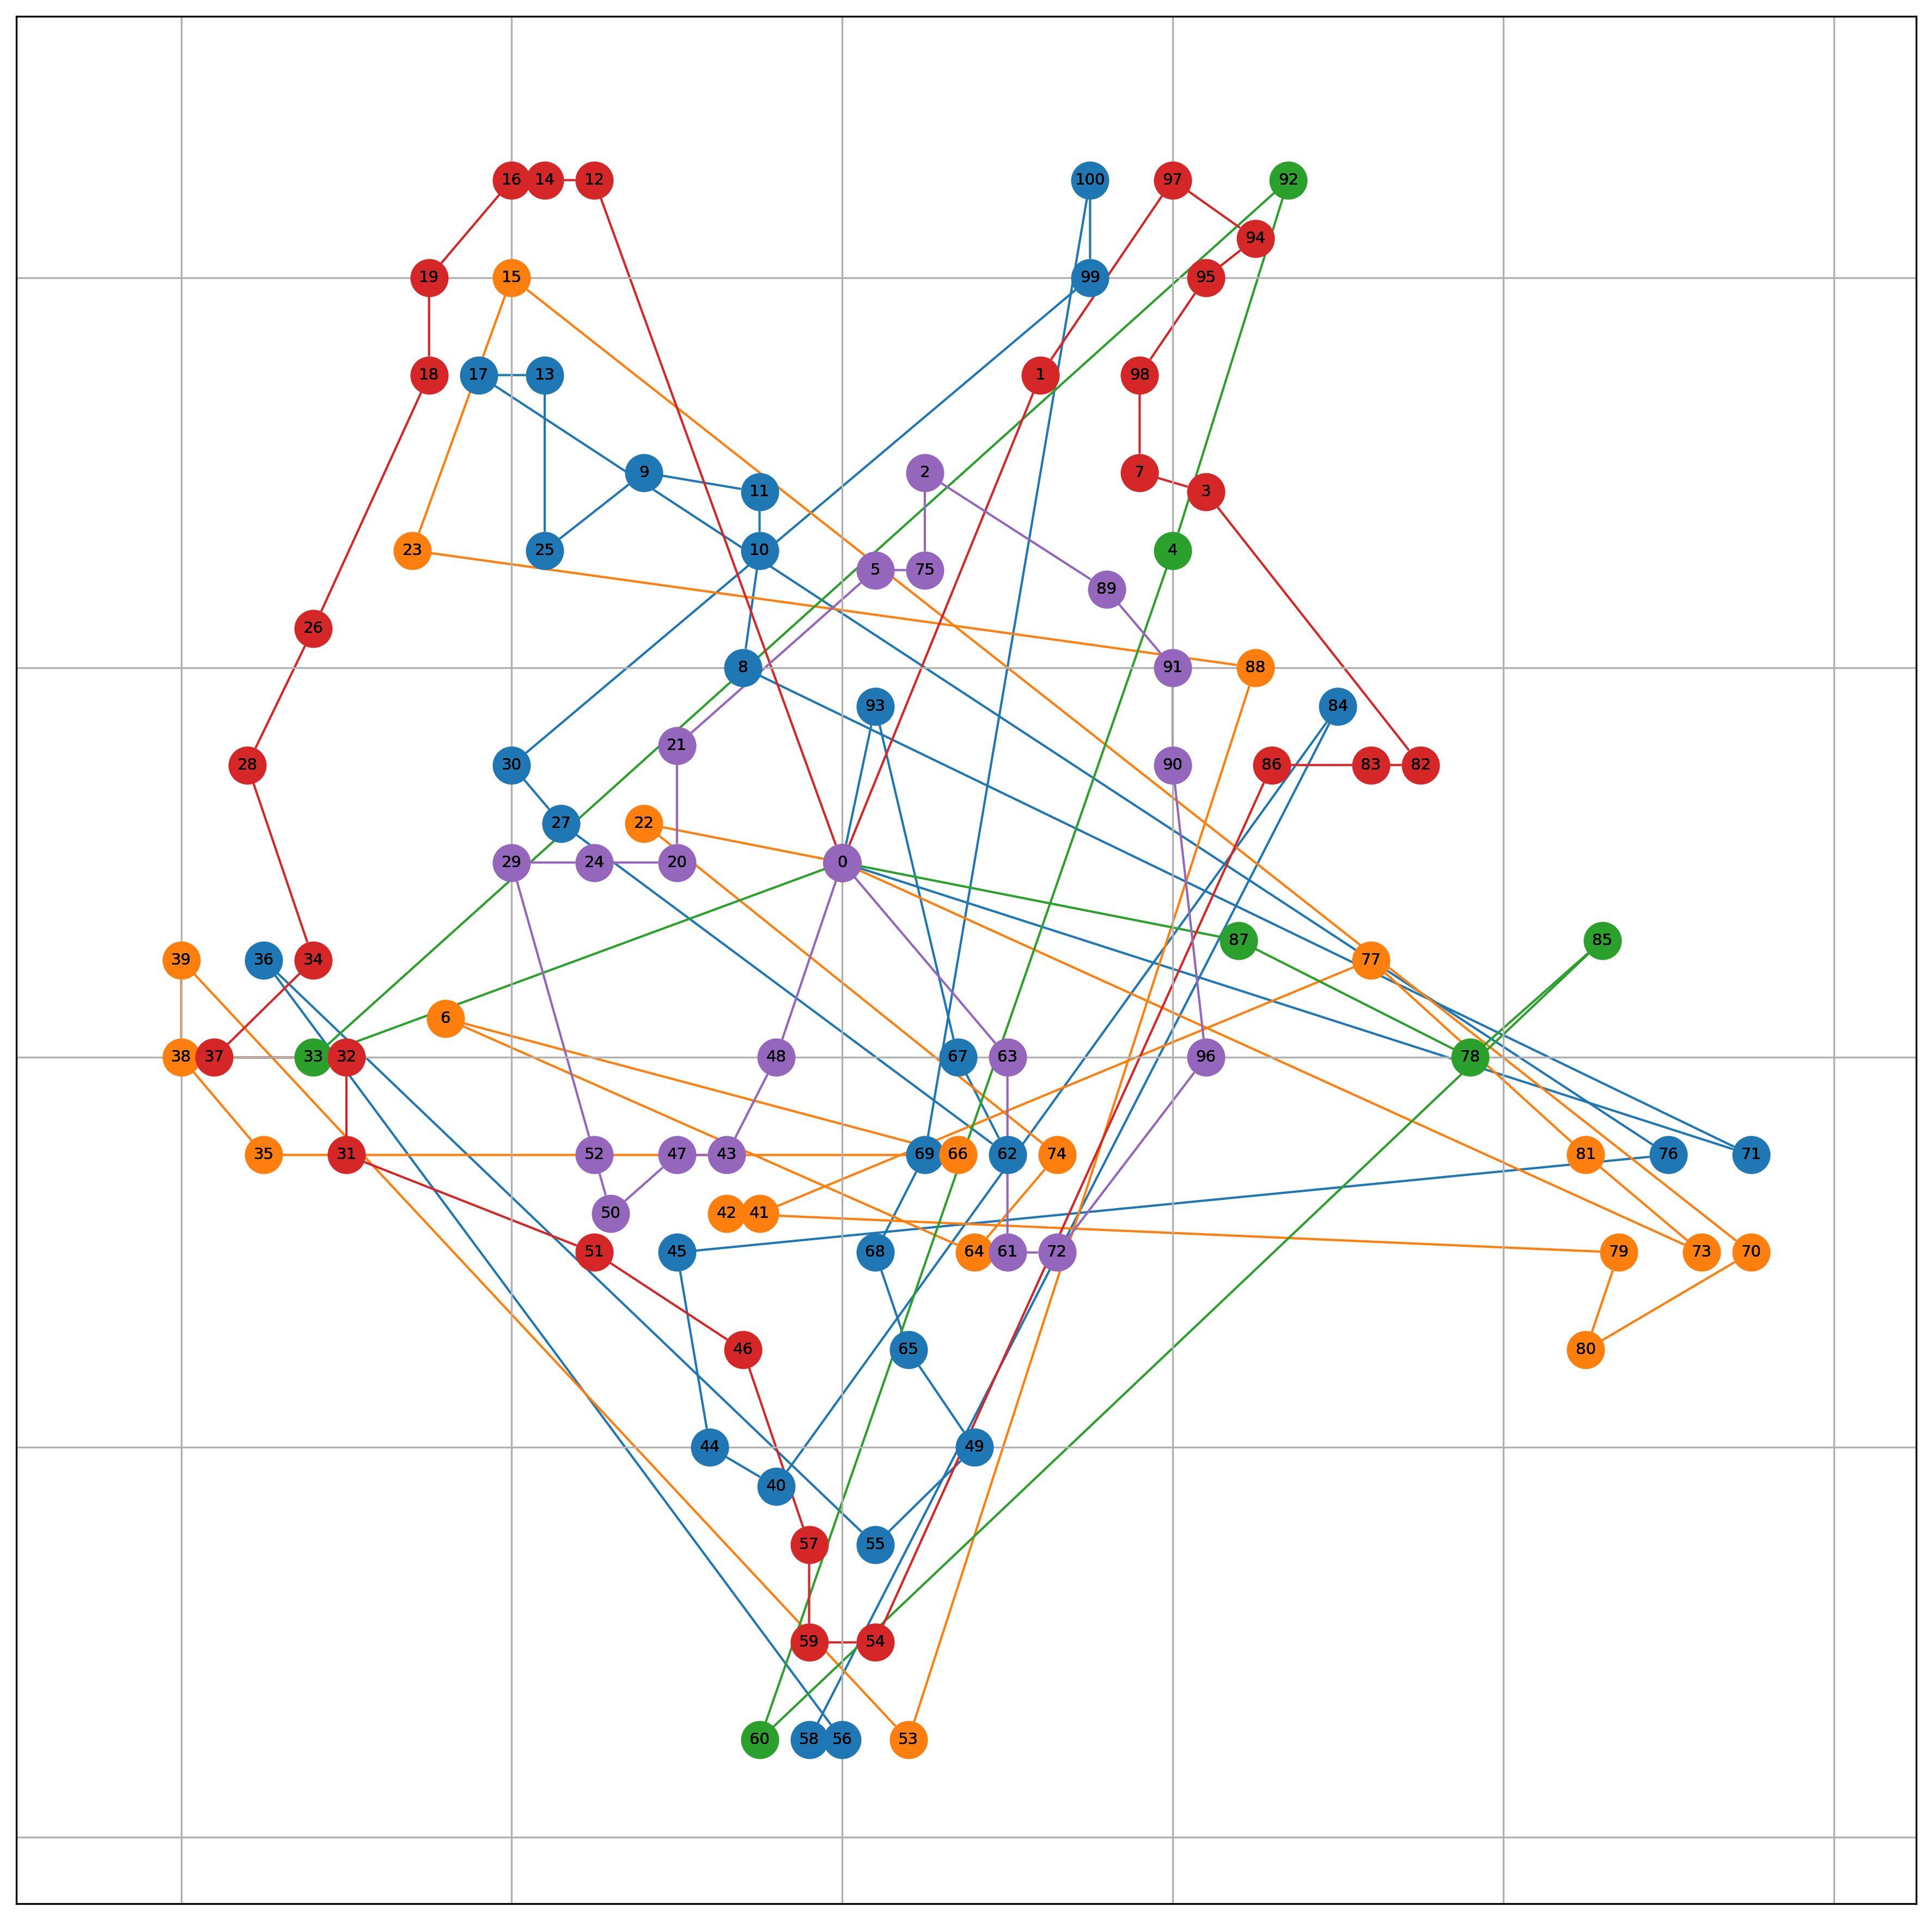

In [26]:
from itertools import cycle
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors
col = cycle(colors.TABLEAU_COLORS)

pos = nx.spring_layout(G)
pos = {point['number']: (point['x'], point['y']) for point in points}

fig, ax = plt.subplots(figsize=(15,15), dpi=300)
ax.grid()

labels = {point['number']: point['number'] for point in points}

# nx.draw_networkx_labels(G, pos=pos, labels=labels, ax=ax)
node_sizes = 250

for path in paths:
    path_color = next(col)
    nodes_in_path = {x for p in path for x in p}
    # node_sizes = [point['demand'] for point in points if point['number'] in nodes_in_path]
    # node_sizes = [point['demand'] * 20 for point in points if point['number'] in nodes_in_path]

    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_in_path, node_size=node_sizes, node_color=path_color, ax=ax)
    nx.draw_networkx_edges(G, pos=pos, edgelist=path, ax=ax, edge_color=path_color,arrows=True)
    nx.draw_networkx_labels(G, pos=pos, labels=labels, ax=ax, font_size=7, font_color='black')
    # for point in points:
    #     plt.text(point['x'], point['y'], f"({point['x']}, {point['y']})", fontsize=8, color='black')
plt.show()
